<a href="https://colab.research.google.com/github/BB-3022/DeepLearning/blob/main/ex04_%EA%B0%9C_%EA%B3%A0%EC%96%91%EC%9D%B4_%EB%B6%84%EB%A5%98%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#/content/drive/MyDrive/Colab Notebooks/DeepLearning/dogs_vs_cats_small
# 데이터 경로지정
train_dir = '/content/drive/MyDrive/Colab Notebooks/DeepLearning/dogs_vs_cats_small/train'
valid_dir = '/content/drive/MyDrive/Colab Notebooks/DeepLearning/dogs_vs_cats_small/validation'

In [2]:
import os

train_dir_dog = os.path.join(train_dir, "dogs")
train_dir_cat = os.path.join(train_dir, "cats")
valid_dir_dog = os.path.join(valid_dir, "dogs")
valid_dir_cat = os.path.join(valid_dir, "cats")

In [3]:
print(f"훈련데이터 개수 (개) : {len(os.listdir(train_dir_dog))}")
print(f"훈련데이터 개수 (고양이) : {len(os.listdir(train_dir_cat))}")
print(f"훈련데이터 개수 (개) : {len(os.listdir(valid_dir_dog))}")
print(f"훈련데이터 개수 (고양이) : {len(os.listdir(valid_dir_cat))}")

훈련데이터 개수 (개) : 1000
훈련데이터 개수 (고양이) : 1000
훈련데이터 개수 (개) : 500
훈련데이터 개수 (고양이) : 500


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 하나의 변수에 이미지 파일 전부 합치기
# 1. 픽셀값(0~255/정수) > (0~1/실수)
# [ 픽셀값 변경이유 ]
#  - 숫자 크기 줄이기, 값 자체가 크면 연상량이 많아서 컴퓨터의 자원소모가 크다.
#  - 분산(값이 분포해 있는 범위) 줄이기 : 연산의 오류가 줄어든다.
# 2. 이미지 크기 맞춰주기(150,150)
# 3. 라벨링
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# 1. 픽셀값 변경
# 묵시적 형변환
## 프로그래밍에서 연산상에서 타입이 변경되도록 하기
generator = ImageDataGenerator(rescale = 1./255) # 1. = 1.0

In [ ]:
# 하나의 변수에 이미지 파일 전부다 합치기
# 이미지 크기 동일하게 만들어주기
# 라벨링
train_generator = generator.flow_from_directory(
    directory = train_dir, #train 이미지 경로
    target_size=(150,150), # 변환할 이미지 크기
    batch_size=100, #한번에 변환할 이미지 개수
    class_mode='binary' #라벨링 방법(이진분류-binary, 다중분류-categorical)
)


Found 2000 images belonging to 2 classes.


In [ ]:
valid_generator = generator.flow_from_directory(
    directory = valid_dir, #train 이미지 경로
    target_size=(150,150), # 변환할 이미지 크기
    batch_size=100, #한번에 변환할 이미지 개수
    class_mode='binary' #라벨링 방법(이진분류-binary, 다중분류-categorical)
)

Found 1000 images belonging to 2 classes.


In [ ]:
# CNN 모델 설계
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [ ]:
# 딥러닝 모델 생성
# 건물 토대 설계
model1 = Sequential()

# 입력층
model1.add(Conv2D(#특징 찾기
    filters = 32, #찾을 특징의 갯수
    kernel_size = (3,3), #특징의 크기
    input_shape = (150,150,3), # 입력 데이터의 모양(3=RGB) # 0:검은색, 255:흰색 / 입력층 첫번째에만 작성
    activation = 'relu' #출력층
))

model1.add(MaxPool2D( # 특징이 아닌부분 삭제하기
    pool_size = (2,2) # 기준 크기에서 1개의 특징만 가져오기 / 4개중에 한개 사용하기

))

# 입력층
model1.add(Conv2D(#특징 찾기
    filters = 32, #찾을 특징의 갯수
    kernel_size = (3,3), #특징의 크기
    activation = 'relu' #출력층
))

model1.add(MaxPool2D( # 특징이 아닌부분 삭제하기
    pool_size = (2,2) # 기준 크기에서 1개의 특징만 가져오기 / 4개중에 한개 사용하기

))

#################특징 추출 부 끝 #####################
model1.add(Flatten()) # 특징추출부와 분류부를 이어주는 역할
##################분류 분석 시작 ################
model1.add(Dense(units = 32, activation='relu')) #출력층이 아닌 activation 에는 relu를 적어주면 작동한다.


# 출력층
model1.add(Dense(units=1, activation='sigmoid'))
# 0~1의 값을 이진분류에 사용
# 0.5를 기준으로 0.5 보다 작으면 0, 0.5 보다 크면 1로 인식한다.


In [ ]:
# 학습 방법 설정
model1.compile(
    loss = 'binary_crossentropy',
    optimizer = 'Adam',
    metrics = ['accuracy']
)

In [ ]:
model1.fit(
    train_generator, #학습데이터(X_train, y_train 합쳐져 있다.)
    epochs = 20,
    validation_data = valid_generator

)

Epoch 1/20
20/20 [==============================] - 633s 32s/step - loss: 0.8306 - accuracy: 0.5015 - val_loss: 0.6915 - val_accuracy: 0.5090
Epoch 2/20
20/20 [==============================] - 11s 583ms/step - loss: 0.6844 - accuracy: 0.5535 - val_loss: 0.6710 - val_accuracy: 0.5990
Epoch 3/20
20/20 [==============================] - 9s 453ms/step - loss: 0.6500 - accuracy: 0.6290 - val_loss: 0.6917 - val_accuracy: 0.5610
Epoch 4/20
20/20 [==============================] - 11s 559ms/step - loss: 0.6264 - accuracy: 0.6380 - val_loss: 0.6540 - val_accuracy: 0.5930
Epoch 5/20
20/20 [==============================] - 8s 420ms/step - loss: 0.5613 - accuracy: 0.7140 - val_loss: 0.6054 - val_accuracy: 0.6630
Epoch 6/20
20/20 [==============================] - 9s 463ms/step - loss: 0.4845 - accuracy: 0.7885 - val_loss: 0.6004 - val_accuracy: 0.6850
Epoch 7/20
20/20 [==============================] - 9s 446ms/step - loss: 0.4251 - accuracy: 0.8090 - val_loss: 0.6422 - val_accuracy: 0.6580
Epoc

In [ ]:
import PIL.Image as pimg
import cv2
# 이미지 불러오기
pre_img = cv2.imread('/content/dog.jpg' ,cv2.IMREAD_COLOR)
# 이미지 색상 변경하기
pre_img = cv2.cvtColor(pre_img, cv2.COLOR_BGR2RGB)
# 이미지 크기 변경하기
pre_img = cv2.resize(pre_img,(150,150))
# 이미지 차원 변경하기
pre_img = pre_img.reshape((1,150,150,3))

error: ignored

In [ ]:
# 0 = cat
# 1 = dog
# 대다수의 사람이 'dog' 라는 결과를 얻는다.
# 모델이 학습이 덜 되서 개의 규칙은 잘 찾았지만, 고양이의 규칙은 찾지 못했기 때문이다.
model1.predict(pre_img)

In [ ]:
# 부동소수점 :소수점의 위치가 변하지 않는다.
# 1.7243704e-35 = 7243704 * 10^(-35) 0에 가까운 숫자이다.

In [ ]:
# train accuracy : 1.0
# val accruracy : 0.701
# train 은 학습이 잘 되었고, val은 학습이 잘 되지 않았다. => 과대적합에 걸렸다.

# 과대적합을 해소하는 방법
# 1. 데이터의 양을 늘린다.( 추가적으로 데이터를 수집)
# 2. 모델을 더 깊게 구성한다.(층을 더 많이 쌓는다)
# 3. 데이터를 확장한다. (가지고 있는 데이터를 다양하게 표현)

In [ ]:
# 데이터 확장을 하고 새롭게 학습한다.
# 데이터를 확장하면 원본 데이터는 사라진다.
# 모델 설계 > 확장 안된 이미지로 학습 > 결과 확인 > 만족스럽지 않다 > 데이터 확장 후 학습(재 학습은 기존의 모델을 사용)

In [ ]:
# 기존 모델에 확장 데이터로 학습하기

# 확장 방법 설정
aug_generator = ImageDataGenerator(
    rescale = 1./255, # 픽셀값 조정
    rotation_range = 20, # 회전 범위
    width_shift_range = 0.1, # 수평 이동
    height_shift_range = 0.1, # 수직 이동
    shear_range = 0.1, #반시계 회전
    zoom_range = 0.1, #확대/축소 비율
    horizontal_flip = True, #수평 뒤집기
    fill_mode = 'nearest' # 가까운 값으로 비어있는 곳을 채운
)

In [ ]:
# 확장
train_aug_generator = aug_generator.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 100,
    class_mode = 'binary'
)

In [ ]:
model1.fit(
    train_aug_generator,
    epochs = 20,
    validation_data = valid_generator
)

# 과대적합을 줄이는 방법들
  - 증식
    - 장점 : 간다
    - 단점 : 가짜는 가짜다(급격한 성능 향상은 없다)
    - epoch 수는 증가시켜주어야 한다.
  - Dropout()
    - 층에 사용하는 퍼셉트론의 수를 설정한 비율만큼 사용하지 않는 방법
    - epoch 마다 사용하지 않는 퍼셉트론은 랜덤
  - BatchNormalization
    - CNN층 = Conv(특성추출) + Maxpooling (크기축소)
    - Conv층의 파라미터를 정규화 (평균 0, 분산 1)
      -> 음수가 발생
      -> relu를 적용하면 음수가 사라지는 문제 -> leaky relu
  - GlobalAveragePooling2D()
    - CNN 가장 문제가 되는 층 : Maxpooling 층
      -> CNN 속도의 60% 이상을 차지
    - Maxpooling2D + Flatten()
    - Dense 층과 연결되는 층에 사용


- Data Generator : 학습 시킬 때 한번에 전체 데이터를 가져오는 것이 아니라 batch_size 만큼씩만 가져와서 처리하도록 하는 것(메모리 자원 부족을 해결)

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

generator = ImageDataGenerator(rescale = 1./255)

train_generator = generator.flow_from_directory(
    directory = train_dir, #train 이미지 경로
    target_size=(150,150), # 변환할 이미지 크기
    batch_size=100, #한번에 변환할 이미지 개수
    class_mode='binary' #라벨링 방법(이진분류-binary, 다중분류-categorical)
)

valid_generator = generator.flow_from_directory(
    directory = valid_dir,
    target_size=(150,150),
    batch_size=100,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
train_generator.class_indices, valid_generator.class_indices

({'cats': 0, 'dogs': 1}, {'cats': 0, 'dogs': 1})

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.layers import Dropout, BatchNormalization, GlobalAveragePooling2D

model1 = Sequential()

model1.add(Conv2D(filters = 32, kernel_size = (3,3),
    input_shape = (150,150,3), activation = 'relu'))
model1.add(MaxPool2D(pool_size = (2,2)))

model1.add(Conv2D(filters = 32, kernel_size = (3,3),
    activation = 'relu'))
model1.add(MaxPool2D(pool_size = (2,2)))

model1.add(Conv2D(filters = 32, kernel_size = (3,3),
    activation = 'relu'))
model1.add(MaxPool2D(pool_size = (2,2)))

model1.add(Conv2D(filters = 128, kernel_size = (3,3),
    activation = 'relu'))
model1.add(MaxPool2D(pool_size = (2,2)))

model1.add(Conv2D(filters = 64, kernel_size = (3,3),
    activation = 'relu'))
model1.add(MaxPool2D( pool_size = (2,2)))

model1.add(Flatten())

model1.add(Dropout(0.5))
model1.add(Dense(units = 64, activation = 'relu'))
model1.add(Dense(units = 128, activation = 'relu'))
model1.add(Dense(units = 64, activation = 'relu'))
model1.add(Dense(units = 32, activation = 'relu'))

model1.add(Dense(units = 1, activation = 'sigmoid'))

model1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 36, 36, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 34, 34, 32)        9248      
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 17, 17, 32)       

In [ ]:
# 학습 방법 설정
model1.compile(
    loss = 'binary_crossentropy',
    optimizer = 'Adam',
    metrics = ['accuracy']
)

In [ ]:
model1.fit(
    train_generator, #학습데이터(X_train, y_train 합쳐져 있다.)
    epochs = 20,
    validation_data = valid_generator

)

Epoch 1/20
20/20 [==============================] - 15s 549ms/step - loss: 0.6949 - accuracy: 0.4980 - val_loss: 0.6922 - val_accuracy: 0.5000
Epoch 2/20
20/20 [==============================] - 9s 459ms/step - loss: 0.6930 - accuracy: 0.5010 - val_loss: 0.6902 - val_accuracy: 0.6220
Epoch 3/20
20/20 [==============================] - 9s 454ms/step - loss: 0.6876 - accuracy: 0.5940 - val_loss: 0.6883 - val_accuracy: 0.5020
Epoch 4/20
20/20 [==============================] - 9s 435ms/step - loss: 0.6787 - accuracy: 0.5735 - val_loss: 0.6756 - val_accuracy: 0.5710
Epoch 5/20
20/20 [==============================] - 9s 479ms/step - loss: 0.6693 - accuracy: 0.5900 - val_loss: 0.6552 - val_accuracy: 0.5990
Epoch 6/20
20/20 [==============================] - 9s 443ms/step - loss: 0.6477 - accuracy: 0.6300 - val_loss: 0.6241 - val_accuracy: 0.6640
Epoch 7/20
20/20 [==============================] - 9s 437ms/step - loss: 0.6288 - accuracy: 0.6525 - val_loss: 0.6184 - val_accuracy: 0.6420
Epoch

GlobalAveragePooling2D

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.layers import Dropout, BatchNormalization, GlobalAveragePooling2D

model1 = Sequential()

model1.add(Conv2D(filters = 32, kernel_size = (3,3),
    input_shape = (150,150,3), activation = 'relu'))
model1.add(MaxPool2D(pool_size = (2,2)))

model1.add(Conv2D(filters = 32, kernel_size = (3,3),
    activation = 'relu'))
model1.add(MaxPool2D(pool_size = (2,2)))

model1.add(Conv2D(filters = 32, kernel_size = (3,3),
    activation = 'relu'))
model1.add(MaxPool2D(pool_size = (2,2)))

model1.add(Conv2D(filters = 128, kernel_size = (3,3),
    activation = 'relu'))
model1.add(MaxPool2D(pool_size = (2,2)))

model1.add(Conv2D(filters = 64, kernel_size = (3,3),
    activation = 'relu'))
# model1.add(MaxPool2D( pool_size = (2,2)))

# model1.add(Flatten())

model1.add(GlobalAveragePooling2D())

model1.add(Dropout(0.5))
model1.add(Dense(units = 64, activation = 'relu'))
model1.add(Dense(units = 128, activation = 'relu'))
model1.add(Dense(units = 64, activation = 'relu'))
model1.add(Dense(units = 32, activation = 'relu'))

model1.add(Dense(units = 1, activation = 'sigmoid'))

model1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_23 (Conv2D)          (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 36, 36, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_24 (Conv2D)          (None, 34, 34, 32)        9248      
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 17, 17, 32)       

In [ ]:
# 학습 방법 설정
model1.compile(
    loss = 'binary_crossentropy',
    optimizer = 'Adam',
    metrics = ['accuracy']
)

In [ ]:
model1.fit(
    train_generator, #학습데이터(X_train, y_train 합쳐져 있다.)
    epochs = 20,
    validation_data = valid_generator

)

Epoch 1/20
20/20 [==============================] - 14s 554ms/step - loss: 0.6931 - accuracy: 0.5065 - val_loss: 0.6924 - val_accuracy: 0.5050
Epoch 2/20
20/20 [==============================] - 9s 442ms/step - loss: 0.6913 - accuracy: 0.5250 - val_loss: 0.6863 - val_accuracy: 0.6050
Epoch 3/20
20/20 [==============================] - 9s 455ms/step - loss: 0.6794 - accuracy: 0.5785 - val_loss: 0.6591 - val_accuracy: 0.6290
Epoch 4/20
20/20 [==============================] - 9s 447ms/step - loss: 0.6572 - accuracy: 0.5980 - val_loss: 0.6455 - val_accuracy: 0.6200
Epoch 5/20
20/20 [==============================] - 11s 554ms/step - loss: 0.6332 - accuracy: 0.6425 - val_loss: 0.6005 - val_accuracy: 0.6910
Epoch 6/20
20/20 [==============================] - 9s 428ms/step - loss: 0.6481 - accuracy: 0.6285 - val_loss: 0.6439 - val_accuracy: 0.6070
Epoch 7/20
20/20 [==============================] - 11s 577ms/step - loss: 0.6307 - accuracy: 0.6420 - val_loss: 0.6154 - val_accuracy: 0.6870
Epo

- BatchNormalization()
  - Conv2D() 와 Activation() 층 사이에 배치
  - Activation()이 정규화 기능을 일부 수행 ->
  Activation() 다음에 배치하면 효과가 떨어짐
  -> C + B + A + M => C + A + B + M

  - 확실하게 성능이 향상된다.
  - 단점 : 참 좋은데 설명할 길이 없다..?

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.layers import Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.layers import Activation

model1 = Sequential()

model1.add(Conv2D(filters = 32, kernel_size = (3,3),
    input_shape = (150,150,3)))
model1.add(BatchNormalization())
model1.add(Activation("leaky_relu"))
model1.add(MaxPool2D(pool_size = (2,2)))

model1.add(Conv2D(filters = 32, kernel_size = (3,3),
    activation = 'leaky_relu'))
model1.add(BatchNormalization())
model1.add(MaxPool2D(pool_size = (2,2)))

model1.add(Conv2D(filters = 32, kernel_size = (3,3),
    activation = 'leaky_relu'))
model1.add(BatchNormalization())
model1.add(MaxPool2D(pool_size = (2,2)))

model1.add(Conv2D(filters = 128, kernel_size = (3,3),
    activation = 'leaky_relu'))
model1.add(BatchNormalization())
model1.add(MaxPool2D(pool_size = (2,2)))

model1.add(Conv2D(filters = 64, kernel_size = (3,3),
    activation = 'leaky_relu'))
model1.add(BatchNormalization())
#model1.add(MaxPool2D( pool_size = (2,2)))

#model1.add(Flatten())

model1.add(GlobalAveragePooling2D())

model1.add(Dropout(0.5))
model1.add(Dense(units = 64, activation = 'relu'))
model1.add(Dense(units = 128, activation = 'relu'))
model1.add(Dense(units = 64, activation = 'relu'))
model1.add(Dense(units = 32, activation = 'relu'))

model1.add(Dense(units = 1, activation = 'sigmoid'))

model1.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 batch_normalization_6 (Bat  (None, 148, 148, 32)      128       
 chNormalization)                                                
                                                                 
 activation_1 (Activation)   (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d_28 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_34 (Conv2D)          (None, 72, 72, 32)        9248      
                                                                 
 batch_normalization_7 (Bat  (None, 72, 72, 32)       

In [ ]:
# 학습 방법 설정
model1.compile(
    loss = 'binary_crossentropy',
    optimizer = 'Adam',
    metrics = ['accuracy']
)

In [ ]:
model1.fit(
    train_generator, #학습데이터(X_train, y_train 합쳐져 있다.)
    epochs = 20,
    validation_data = valid_generator

)

Epoch 1/20
20/20 [==============================] - 14s 440ms/step - loss: 0.6665 - accuracy: 0.5950 - val_loss: 0.7039 - val_accuracy: 0.5000
Epoch 2/20
20/20 [==============================] - 11s 550ms/step - loss: 0.6156 - accuracy: 0.6695 - val_loss: 0.7613 - val_accuracy: 0.5000
Epoch 3/20
20/20 [==============================] - 11s 556ms/step - loss: 0.5676 - accuracy: 0.7170 - val_loss: 1.0366 - val_accuracy: 0.5000
Epoch 4/20
20/20 [==============================] - 9s 436ms/step - loss: 0.5413 - accuracy: 0.7275 - val_loss: 1.1682 - val_accuracy: 0.5000
Epoch 5/20
20/20 [==============================] - 9s 462ms/step - loss: 0.5000 - accuracy: 0.7685 - val_loss: 1.5262 - val_accuracy: 0.5000
Epoch 6/20
20/20 [==============================] - 9s 455ms/step - loss: 0.4760 - accuracy: 0.7715 - val_loss: 1.5738 - val_accuracy: 0.5000
Epoch 7/20
20/20 [==============================] - 9s 437ms/step - loss: 0.4261 - accuracy: 0.8035 - val_loss: 1.8355 - val_accuracy: 0.5000
Epo

# 전이학습 (Transfer Learning)
  - 미리 학습된 모델이나 가중치를 가져다 쓰는 기법

  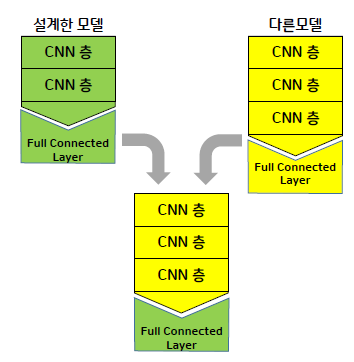

#VGG16을 다운로드

In [7]:
from tensorflow.keras.applications import VGG16

#weights : 사용할 가중치의 종류(imagenent)
# include_top = False :모델을 전체 또는 특성 추출기만 가져올 것인지 선택 (False : 특성추출기만 가져옴)
# input_shape :
conv_base = VGG16(weights="imagenet",
                  include_top = False,
                  input_shape = (150,150,3)
)


58889256/58889256 [==============================] - 0s 0us/step


In [8]:
# VGG16 모델을 확인
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

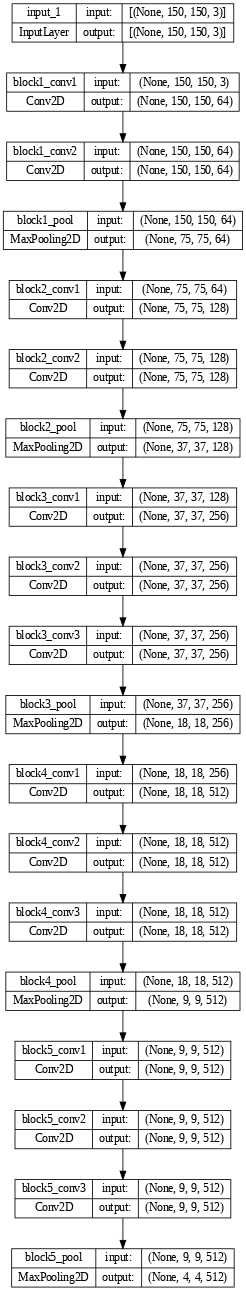

In [11]:
# plot_model()로 시각화
from tensorflow.keras.utils import plot_model

# show_shapes=True : 신경망 형태 표기 여부
# dpi=60 : 이미지 출력 크기
plot_model(conv_base, show_shapes=True, dpi=60)

# 신경망 구조를 이미지로 시각화

In [12]:
!pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.0/993.0 kB 7.0 MB/s eta 0:00:00


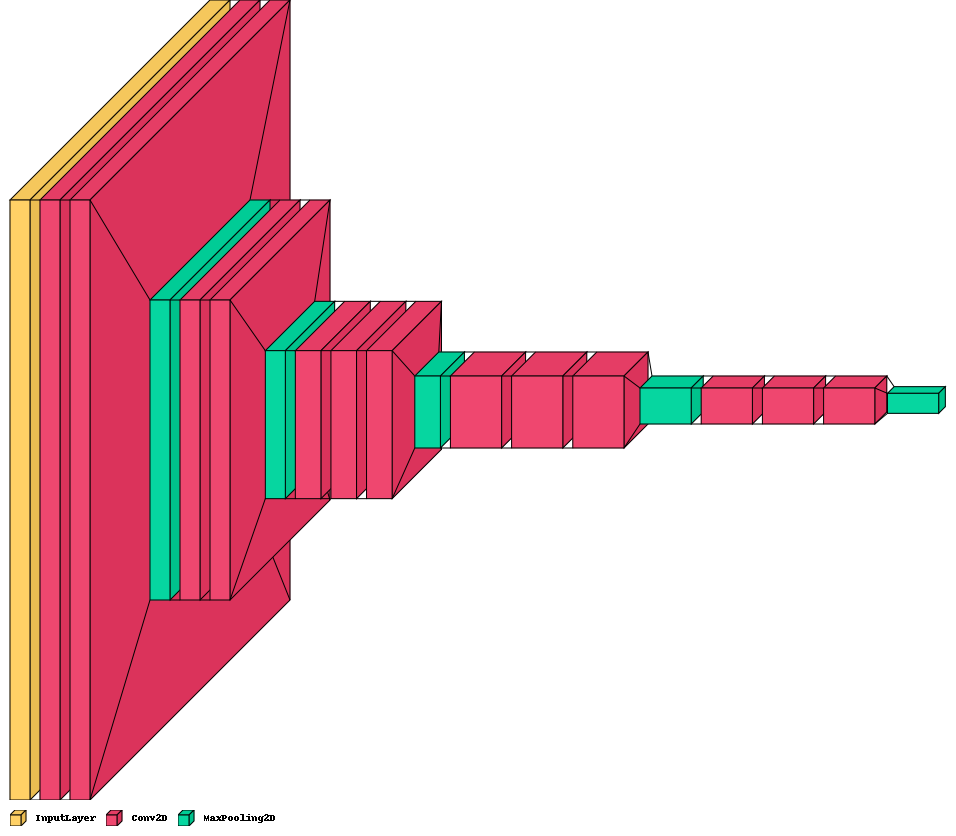

In [14]:
import visualkeras

# 신경망 층을 시각화
visualkeras.layered_view(conv_base).show()
# 층 이름의 범례 표시
visualkeras.layered_view(conv_base, legend=True)

- 학습이 가능한 파라미터 종류의 수 확인

In [16]:
print(f"학습 가능한 파라미터 종류의 수 : {len(conv_base.trainable_weights)}")

# 층 13, 각 층마다 w와 b값이 있으므로 파라미터 종류의 수 = 26 이다.

학습 가능한 파라미터 종류의 수 : 26


- 우리 모델에 VGG16을 연결

In [18]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten


model1 = Sequential()

model1.add(conv_base)
model1.add(Flatten())

model1.add(Dropout(0.5))
model1.add(Dense(units = 64, activation = 'relu'))
model1.add(Dense(units = 128, activation = 'relu'))
model1.add(Dense(units = 64, activation = 'relu'))
model1.add(Dense(units = 32, activation = 'relu'))
model1.add(Dense(units = 1, activation = 'sigmoid'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dropout (Dropout)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 64)                524352    
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2

# 동결 : 가져온 모델은 학습이 되지 않도록 설정

In [20]:
print(f"훈련 가능한 파라미터의 종류 : {len(model1.trainable_weights)}")

훈련 가능한 파라미터의 종류 : 36


In [21]:
# VGG16 모델은 훈련이 되지 않도록 설정
conv_base.trainable = False

In [22]:
print(f"훈련 가능한 파라미터의 종류 : {len(model1.trainable_weights)}")

훈련 가능한 파라미터의 종류 : 10


In [23]:
# 학습 방법 설정
model1.compile(
    loss = 'binary_crossentropy',
    optimizer = 'Adam',
    metrics = ['accuracy']
)

In [24]:
model1.fit(
    train_generator, #학습데이터(X_train, y_train 합쳐져 있다.)
    epochs = 20,
    validation_data = valid_generator

)

Epoch 1/20
20/20 [==============================] - 556s 27s/step - loss: 0.4956 - accuracy: 0.7530 - val_loss: 0.2951 - val_accuracy: 0.8790
Epoch 2/20
20/20 [==============================] - 11s 577ms/step - loss: 0.2700 - accuracy: 0.8915 - val_loss: 0.2530 - val_accuracy: 0.8950
Epoch 3/20
20/20 [==============================] - 10s 496ms/step - loss: 0.2109 - accuracy: 0.9180 - val_loss: 0.2479 - val_accuracy: 0.8990
Epoch 4/20
20/20 [==============================] - 10s 489ms/step - loss: 0.2133 - accuracy: 0.9080 - val_loss: 0.2581 - val_accuracy: 0.8950
Epoch 5/20
20/20 [==============================] - 9s 473ms/step - loss: 0.1781 - accuracy: 0.9240 - val_loss: 0.2485 - val_accuracy: 0.8910
Epoch 6/20
20/20 [==============================] - 11s 527ms/step - loss: 0.1419 - accuracy: 0.9450 - val_loss: 0.2456 - val_accuracy: 0.9010
Epoch 7/20
20/20 [==============================] - 10s 489ms/step - loss: 0.1404 - accuracy: 0.9410 - val_loss: 0.2648 - val_accuracy: 0.8950
E